## EXAMEN DE CLASIFICACION 

#### AUTOR: CARLOS MOROCHO
Desarrollar una red neuronal que realice un proceso de clasificación de tipos de sueldo que
gana una persona de acuerdo al Censo

In [2]:
# Importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pp

### LECTURA DEL DATASET

In [3]:
dataset = pd.read_csv('datos-censo.data', header=None)
dataset.head()

0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-States   <=50K  
4            Cuba   <=50K

In [4]:
# Detallamos la columnas
COLUMS_NUMERICAS = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
COLUMS_CATEGORICAS = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                      'native-country', "salario"]
# Obtiene los datos numericos
dataset_num = dataset.iloc[:,[0, 2, 4, 10, 11, 12]]
dataset_num.columns = COLUMS_NUMERICAS
# Obtiene los datos categoricos
dataset_text = dataset.iloc[:,[1, 3, 5, 6, 7, 8, 9, 13, 14]]
dataset_text.columns = COLUMS_CATEGORICAS

In [5]:
dataset_num.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40

In [6]:
dataset_text.head()

workclass   education       marital-status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native-country salario  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

### TRANSFORMAMOS LOS DATOS

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

En el caso de las variables numericas solo remplazamos el valor ? por 0

In [8]:
# Remplazamos los valores ? por 0
dataset_num.replace(to_replace =" ?", value ="0") 
print()

En el caso de las variables caegoricas realizamos la transformacion de los datos alfanuemricos a valores categoricos numericos, por lo que el valor ? esta  incluido como una catergoria mas en los atributos

In [9]:
# realizamos la transformacion de las categoicas
preprocesador = make_column_transformer((OrdinalEncoder(), COLUMS_CATEGORICAS), remainder='passthrough')
data_transformada = preprocesador.fit_transform(dataset_text)
dataset_text = pd.DataFrame(data_transformada, columns=COLUMS_CATEGORICAS)
dataset_text.head()

workclass  education  marital-status  occupation  relationship  race  sex  \
0        7.0        9.0             4.0         1.0           1.0   4.0  1.0   
1        6.0        9.0             2.0         4.0           0.0   4.0  1.0   
2        4.0       11.0             0.0         6.0           1.0   4.0  1.0   
3        4.0        1.0             2.0         6.0           0.0   2.0  1.0   
4        4.0        9.0             2.0        10.0           5.0   2.0  0.0   

   native-country  salario  
0            39.0      0.0  
1            39.0      0.0  
2            39.0      0.0  
3            39.0      0.0  
4             5.0      0.0

### NORMLIZAMOS LOS DATOS

In [10]:
# concatenamos los dos dataset
dataset_result = pd.concat([dataset_num, dataset_text], axis=1)
dataset_result.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass  education  marital-status  occupation  relationship  race  sex  \
0        7.0        9.0             4.0         1.0           1.0   4.0  1.0   
1        6.0        9.0             2.0         4.0           0.0   4.0  1.0   
2        4.0       11.0             0.0         6.0           1.0   4.0  1.0   
3        4.0        1.0             2.0         6.0           0.0   2.0  1.0   
4        4.0        9.0             2.0        10.0           5.0   2.0  0.0   

   native-country  salario  
0            39.0      0.0  
1            39.0      0.0  
2            39.0      0.0  
3            39.0      0.0  
4             5.0      0.0

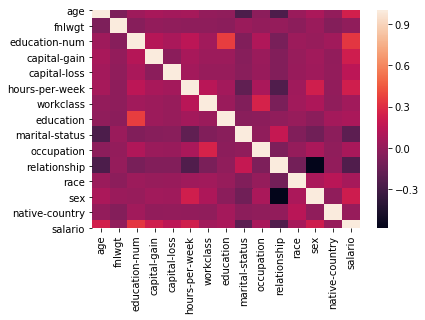

In [11]:
# Verificamos los datos correlacionados
correlacion = dataset_result.corr()
sns.heatmap(correlacion, xticklabels = correlacion.columns.values, yticklabels = correlacion.columns.values)

In [12]:
# Importamos la clase de normalizacion minMax scaler
from sklearn.preprocessing import MinMaxScaler

In [13]:
# normalizamos con el metodo de minMaxScaler
X_dataset = dataset_result.iloc[:,0:14]
minMaxScaler = MinMaxScaler(feature_range = (-1, 1))
X_MinMax = pd.DataFrame(minMaxScaler.fit_transform(X_dataset))
X_MinMax.head()

C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0         1         2        3    4         5     6         7   \
0 -0.397260 -0.911396  0.600000 -0.95652 -1.0 -0.204082  0.75  0.200000   
1 -0.095890 -0.903525  0.600000 -1.00000 -1.0 -0.755102  0.50  0.200000   
2 -0.424658 -0.723773  0.066667 -1.00000 -1.0 -0.204082  0.00  0.466667   
3 -0.013699 -0.697863 -0.200000 -1.00000 -1.0 -0.204082  0.00 -0.866667   
4 -0.698630 -0.557023  0.600000 -1.00000 -1.0 -0.204082  0.00  0.200000   

         8         9    10   11   12        13  
0  0.333333 -0.857143 -0.6  1.0  1.0  0.902439  
1 -0.333333 -0.428571 -1.0  1.0  1.0  0.902439  
2 -1.000000 -0.142857 -0.6  1.0  1.0  0.902439  
3 -0.333333 -0.142857 -1.0  0.0  1.0  0.902439  
4 -0.333333  0.428571  1.0  0.0 -1.0 -0.756098

### ENTRENAMOS LA RED

In [14]:
# importamos la libreria de keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [15]:
# reazliamos una prueba con una capa
model = Sequential()
model.add(Dense(14, activation = 'relu', input_shape = (14, )))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
historial = model.fit(X_MinMax, dataset_result.salario, validation_split = 0.3, epochs = 20, batch_size = 60, verbose = 1)

Train on 22792 samples, validate on 9769 samples
Epoch 1/20
22792/22792 [==============================] - 2s 68us/step - loss: 0.5389 - accuracy: 0.7592 - val_loss: 0.5128 - val_accuracy: 0.7540
Epoch 2/20
22792/22792 [==============================] - 1s 49us/step - loss: 0.4912 - accuracy: 0.7616 - val_loss: 0.4814 - val_accuracy: 0.7542
Epoch 3/20
22792/22792 [==============================] - 1s 63us/step - loss: 0.4669 - accuracy: 0.7639 - val_loss: 0.4564 - val_accuracy: 0.7619
Epoch 4/20
22792/22792 [==============================] - 1s 54us/step - loss: 0.4467 - accuracy: 0.7835 - val_loss: 0.4358 - val_accuracy: 0.7926
Epoch 5/20
22792/22792 [==============================] - 1s 64us/step - loss: 0.4299 - accuracy: 0.8008 - val_loss: 0.4186 - val_accuracy: 0.8079
Epoch 6/20
22792/22792 [==============================] - 1s 51us/step - loss: 0.4170 - accuracy: 0.8078 - val_loss: 0.4061 - val_accuracy: 0.8111
Epoch 7/20
22792/22792 [==============================] - 1s 51us/ste

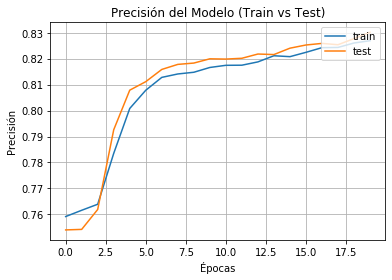

In [31]:
pp.plot(historial.history['accuracy'])
pp.plot(historial.history['val_accuracy'])
pp.title('Precisión del Modelo (Train vs Test)')
pp.ylabel('Precisión')
pp.xlabel('Épocas')
pp.legend(['Train','Test'], loc = 'upper right')
pp.grid(True)
pp.show()

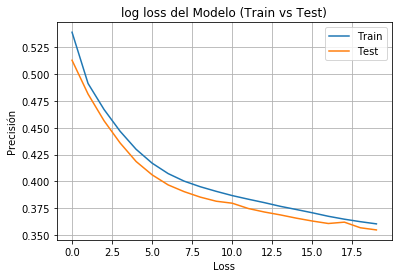

In [35]:
pp.plot(historial.history['loss'])
pp.plot(historial.history['val_loss'])
pp.title('Log loss del Modelo (Train vs Test)')
pp.ylabel('Precisión')
pp.xlabel('Loss')
pp.legend(['Train','Test'], loc = 'upper right')
pp.grid(True)
pp.show()

In [109]:
# reazliamos una prueba con una capa
model1 = Sequential()
model1.add(Dense(14, activation = 'relu', input_shape = (14, )))
model1.add(Dense(10, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [110]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
historial1 = model1.fit(X_MinMax, dataset_result.salario, validation_split = 0.3, epochs = 30, batch_size = 5, verbose = 1)

Train on 22792 samples, validate on 9769 samples
Epoch 1/30
22792/22792 [==============================] - 18s 812us/step - loss: 0.4380 - accuracy: 0.7925 - val_loss: 0.3885 - val_accuracy: 0.8192
Epoch 2/30
22792/22792 [==============================] - 15s 680us/step - loss: 0.3827 - accuracy: 0.8205 - val_loss: 0.3603 - val_accuracy: 0.8296
Epoch 3/30
22792/22792 [==============================] - 21s 910us/step - loss: 0.3649 - accuracy: 0.8261 - val_loss: 0.3501 - val_accuracy: 0.8350
Epoch 4/30
22792/22792 [==============================] - 19s 850us/step - loss: 0.3538 - accuracy: 0.8329 - val_loss: 0.3437 - val_accuracy: 0.8387
Epoch 5/30
22792/22792 [==============================] - 14s 625us/step - loss: 0.3488 - accuracy: 0.8328 - val_loss: 0.3408 - val_accuracy: 0.8396
Epoch 6/30
22792/22792 [==============================] - 16s 683us/step - loss: 0.3457 - accuracy: 0.8356 - val_loss: 0.3389 - val_accuracy: 0.8423
Epoch 7/30
22792/22792 [==============================] -

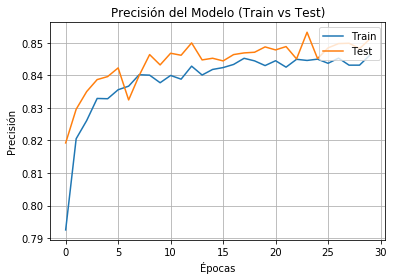

In [111]:
pp.plot(historial1.history['accuracy'])
pp.plot(historial1.history['val_accuracy'])
pp.title('Precisión del Modelo (Train vs Test)')
pp.ylabel('Precisión')
pp.xlabel('Épocas')
pp.legend(['Train','Test'], loc = 'upper right')
pp.grid(True)
pp.show()

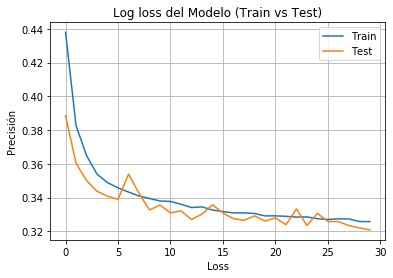

In [112]:
pp.plot(historial1.history['loss'])
pp.plot(historial1.history['val_loss'])
pp.title('Log loss del Modelo (Train vs Test)')
pp.ylabel('Precisión')
pp.xlabel('Loss')
pp.legend(['Train','Test'], loc = 'upper right')
pp.grid(True)
pp.show()

In [105]:
# reazliamos una prueba con una capa
model2 = Sequential()
model2.add(Dense(14, activation = 'relu', input_shape = (14, )))
model2.add(Dense(20, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

In [106]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
historial2 = model2.fit(X_MinMax, dataset_result.salario, validation_split = 0.3, epochs = 40, batch_size = 100, verbose = 1)

Train on 22792 samples, validate on 9769 samples
Epoch 1/40
22792/22792 [==============================] - 1s 50us/step - loss: 0.5395 - accuracy: 0.7592 - val_loss: 0.5213 - val_accuracy: 0.7534
Epoch 2/40
22792/22792 [==============================] - 1s 33us/step - loss: 0.5077 - accuracy: 0.7602 - val_loss: 0.4992 - val_accuracy: 0.7534
Epoch 3/40
22792/22792 [==============================] - 1s 36us/step - loss: 0.4901 - accuracy: 0.7631 - val_loss: 0.4821 - val_accuracy: 0.7601
Epoch 4/40
22792/22792 [==============================] - 1s 34us/step - loss: 0.4757 - accuracy: 0.7692 - val_loss: 0.4671 - val_accuracy: 0.7674
Epoch 5/40
22792/22792 [==============================] - 1s 47us/step - loss: 0.4628 - accuracy: 0.7756 - val_loss: 0.4535 - val_accuracy: 0.7796
Epoch 6/40
22792/22792 [==============================] - 1s 37us/step - loss: 0.4513 - accuracy: 0.7847 - val_loss: 0.4416 - val_accuracy: 0.7893
Epoch 7/40
22792/22792 [==============================] - 1s 56us/ste

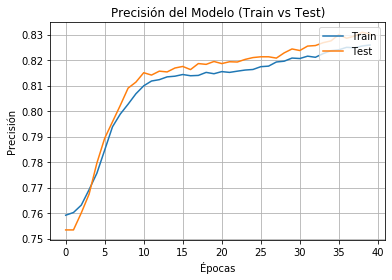

In [107]:
pp.plot(historial2.history['accuracy'])
pp.plot(historial2.history['val_accuracy'])
pp.title('Precisión del Modelo (Train vs Test)')
pp.ylabel('Precisión')
pp.xlabel('Épocas')
pp.legend(['Train','Test'], loc = 'upper right')
pp.grid(True)
pp.show()

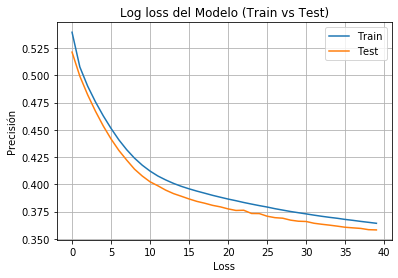

In [108]:
pp.plot(historial2.history['loss'])
pp.plot(historial2.history['val_loss'])
pp.title('Log loss del Modelo (Train vs Test)')
pp.ylabel('Precisión')
pp.xlabel('Loss')
pp.legend(['Train','Test'], loc = 'upper right')
pp.grid(True)
pp.show()

In [93]:
# reazliamos una prueba con una capa
model3 = Sequential()
model3.add(Dense(14, activation = 'relu', input_shape = (14, )))
model3.add(Dense(20, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [96]:
model3.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
historial3 = model3.fit(X_MinMax, dataset_result.salario, validation_split = 0.3, epochs = 100, batch_size = 200, verbose = 1)

Train on 22792 samples, validate on 9769 samples
Epoch 1/100
22792/22792 [==============================] - 1s 33us/step - loss: 0.3631 - accuracy: 0.8279 - val_loss: 0.3584 - val_accuracy: 0.8328
Epoch 2/100
22792/22792 [==============================] - 0s 18us/step - loss: 0.3627 - accuracy: 0.8277 - val_loss: 0.3574 - val_accuracy: 0.8312
Epoch 3/100
22792/22792 [==============================] - 0s 19us/step - loss: 0.3621 - accuracy: 0.8287 - val_loss: 0.3571 - val_accuracy: 0.8322
Epoch 4/100
22792/22792 [==============================] - 0s 18us/step - loss: 0.3615 - accuracy: 0.8273 - val_loss: 0.3565 - val_accuracy: 0.8325
Epoch 5/100
22792/22792 [==============================] - 0s 18us/step - loss: 0.3612 - accuracy: 0.8292 - val_loss: 0.3568 - val_accuracy: 0.8321
Epoch 6/100
22792/22792 [==============================] - 1s 26us/step - loss: 0.3605 - accuracy: 0.8292 - val_loss: 0.3556 - val_accuracy: 0.8320
Epoch 7/100
22792/22792 [==============================] - 0s 2

Epoch 56/100
22792/22792 [==============================] - 0s 18us/step - loss: 0.3417 - accuracy: 0.8391 - val_loss: 0.3387 - val_accuracy: 0.8429
Epoch 57/100
22792/22792 [==============================] - 0s 17us/step - loss: 0.3415 - accuracy: 0.8388 - val_loss: 0.3386 - val_accuracy: 0.8424
Epoch 58/100
22792/22792 [==============================] - 0s 17us/step - loss: 0.3411 - accuracy: 0.8389 - val_loss: 0.3384 - val_accuracy: 0.8422
Epoch 59/100
22792/22792 [==============================] - 0s 18us/step - loss: 0.3410 - accuracy: 0.8396 - val_loss: 0.3383 - val_accuracy: 0.8425
Epoch 60/100
22792/22792 [==============================] - 0s 18us/step - loss: 0.3407 - accuracy: 0.8388 - val_loss: 0.3382 - val_accuracy: 0.8411
Epoch 61/100
22792/22792 [==============================] - 0s 18us/step - loss: 0.3403 - accuracy: 0.8394 - val_loss: 0.3390 - val_accuracy: 0.8441
Epoch 62/100
22792/22792 [==============================] - 0s 20us/step - loss: 0.3403 - accuracy: 0.8401

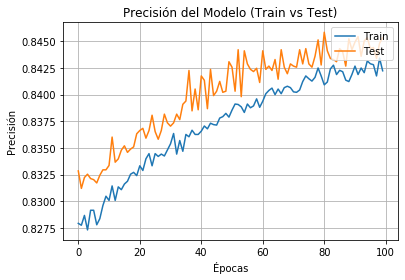

In [102]:
pp.plot(historial3.history['accuracy'])
pp.plot(historial3.history['val_accuracy'])
pp.title('Precisión del Modelo (Train vs Test)')
pp.ylabel('Precisión')
pp.xlabel('Épocas')
pp.legend(['Train','Test'], loc = 'upper right')
pp.grid(True)
pp.show()

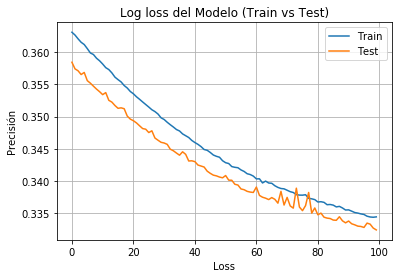

In [103]:
pp.plot(historial3.history['loss'])
pp.plot(historial3.history['val_loss'])
pp.title('Log loss del Modelo (Train vs Test)')
pp.ylabel('Precisión')
pp.xlabel('Loss')
pp.legend(['Train','Test'], loc = 'upper right')
pp.grid(True)
pp.show()

### MATRIZ DE CONFUSION

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_MinMax, dataset_result.salario, test_size = 0.3,\
                                                    stratify = dataset_result.salario)

In [131]:
predictions = model3.predict(X_test).round()
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [133]:
confusion = confusion_matrix(y_test, predictions)
pd.DataFrame(confusion)

0     1
0  6893   524
1   979  1373

### FUNCION PARA PRUEBA COMPLETA

Cabe aclarar que el dataset que se intente probar debe tener la misma cantidad de columnas con su respectiva estructura.

In [18]:
# Realizamos la funcion para el entrenamiento de prueba completa

def clasificaicon_keras(file_name):
    # leemos el dataset
    dataset = pd.read_csv(file_name, header=None)
    
    # Obtiene los datos numericos
    dataset_num = dataset.iloc[:,[0, 2, 4, 10, 11, 12]]
    dataset_num.columns = COLUMS_NUMERICAS
    # Obtiene los datos categoricos
    dataset_text = dataset.iloc[:,[1, 3, 5, 6, 7, 8, 9, 13, 14]]
    dataset_text.columns = COLUMS_CATEGORICAS
    
    # Tranformamos los datos
    dataset_num.replace(to_replace =" ?", value ="0")
    preprocesador = make_column_transformer((OrdinalEncoder(), COLUMS_CATEGORICAS), remainder='passthrough')
    data_transformada = preprocesador.fit_transform(dataset_text)
    dataset_text = pd.DataFrame(data_transformada, columns=COLUMS_CATEGORICAS)
    
    # Normalizamos los datos
    dataset_result = pd.concat([dataset_num, dataset_text], axis=1)
    X_dataset = dataset_result.iloc[:,0:14]
    minMaxScaler = MinMaxScaler(feature_range = (-1, 1))
    X_MinMax = pd.DataFrame(minMaxScaler.fit_transform(X_dataset))
    
    # Ejecutamos los entrenamientos
    model = Sequential()
    model.add(Dense(14, activation = 'relu', input_shape = (14, )))
    model.add(Dense(20, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
    historial = model.fit(X_MinMax, dataset_result.salario, validation_split = 0.3, epochs = 100, batch_size = 200,
                          verbose = 1)
    
    # Graficamos los datos
    plot1 = pp.figure(1)
    pp.plot(historial.history['accuracy'])
    pp.plot(historial.history['val_accuracy'])
    pp.title('Precisión del Modelo (Train vs Test)')
    pp.ylabel('Precisión')
    pp.xlabel('Épocas')
    pp.legend(['Train','Test'], loc = 'upper right')
    pp.grid(True)
    pp.show()
    
    plot2 = pp.figure(2)
    pp.plot(historial.history['loss'])
    pp.plot(historial.history['val_loss'])
    pp.title('Log loss del Modelo (Train vs Test)')
    pp.ylabel('Precisión')
    pp.xlabel('Loss')
    pp.legend(['Train','Test'], loc = 'upper right')
    pp.grid(True)
    pp.show()
    
    # Matriz de cnfusion
    X_train, X_test, y_train, y_test = train_test_split(X_MinMax, dataset_result.salario, test_size = 0.3,\
                                                    stratify = dataset_result.salario)
    predictions = model.predict(X_test).round()
    confusion = confusion_matrix(y_test, predictions)
    print("MATRIZ DE CONFUSION \n", pd.DataFrame(confusion))

C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 22792 samples, validate on 9769 samples
Epoch 1/100
22792/22792 [==============================] - 1s 31us/step - loss: 0.5233 - accuracy: 0.7616 - val_loss: 0.5090 - val_accuracy: 0.7539
Epoch 2/100
22792/22792 [==============================] - 1s 22us/step - loss: 0.4938 - accuracy: 0.7615 - val_loss: 0.4869 - val_accuracy: 0.7540
Epoch 3/100
22792/22792 [==============================] - 1s 23us/step - loss: 0.4763 - accuracy: 0.7616 - val_loss: 0.4713 - val_accuracy: 0.7549
Epoch 4/100
22792/22792 [==============================] - 1s 24us/step - loss: 0.4636 - accuracy: 0.7625 - val_loss: 0.4592 - val_accuracy: 0.7565
Epoch 5/100
22792/22792 [==============================] - 0s 16us/step - loss: 0.4537 - accuracy: 0.7639 - val_loss: 0.4493 - val_accuracy: 0.7578
Epoch 6/100
22792/22792 [==============================] - 0s 16us/step - loss: 0.4455 - accuracy: 0.7665 - val_loss: 0.4410 - val_accuracy: 0.7625
Epoch 7/100
22792/22792 [==============================] - 0s 1

22792/22792 [==============================] - 0s 16us/step - loss: 0.3625 - accuracy: 0.8270 - val_loss: 0.3556 - val_accuracy: 0.8322
Epoch 56/100
22792/22792 [==============================] - 0s 19us/step - loss: 0.3621 - accuracy: 0.8274 - val_loss: 0.3550 - val_accuracy: 0.8326
Epoch 57/100
22792/22792 [==============================] - 0s 17us/step - loss: 0.3615 - accuracy: 0.8275 - val_loss: 0.3542 - val_accuracy: 0.8345
Epoch 58/100
22792/22792 [==============================] - 0s 16us/step - loss: 0.3610 - accuracy: 0.8277 - val_loss: 0.3538 - val_accuracy: 0.8339
Epoch 59/100
22792/22792 [==============================] - 0s 16us/step - loss: 0.3605 - accuracy: 0.8277 - val_loss: 0.3542 - val_accuracy: 0.8335
Epoch 60/100
22792/22792 [==============================] - 0s 16us/step - loss: 0.3601 - accuracy: 0.8278 - val_loss: 0.3528 - val_accuracy: 0.8338
Epoch 61/100
22792/22792 [==============================] - 0s 16us/step - loss: 0.3596 - accuracy: 0.8289 - val_loss: 

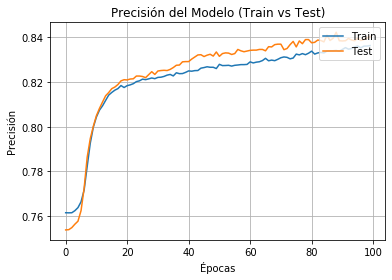

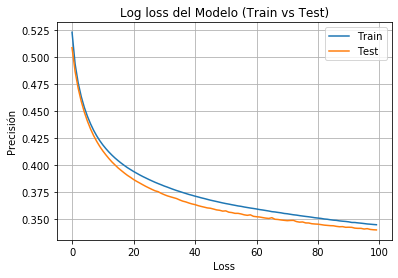

NameError: name 'train_test_split' is not defined

In [19]:
# ejecutamos la funcion
clasificaicon_keras("datos-censo.data")